# redicción de abandono de clientes (Customer Churn) con KNN

Contexto real

Una empresa de suscripción digital (streaming, SaaS, gimnasio, etc.) quiere predecir si un cliente abandonará el servicio (churn) basándose en su comportamiento y uso de la plataforma.

El objetivo es construir un modelo K-Nearest Neighbors (KNN) que clasifique a los clientes en:

0 → No abandona

1 → Abandona

Importación de librerías

Importa pandas, seaborn y las librerías habituales.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Obtención de los datos

Lee el archivo churn_knn_project.csv y cárgalo en un DataFrame.

In [3]:
df = pd.read_csv('churn_knn_project.csv')
print(df.head())

   edad  meses_suscrito  uso_semanal_horas  incidencias_soporte  \
0    56              16                3.0                    0   
1    69              39                6.0                    0   
2    46               5                3.9                    1   
3    32              22                3.4                    1   
4    60              29                4.8                    1   

   precio_mensual  descuentos_usados  CHURN  
0           29.99                  1      0  
1           39.99                  3      0  
2           39.99                  2      0  
3           39.99                  4      0  
4           34.99                  0      0  


Análisis Exploratorio de Datos (EDA)

Dado que el dataset es artificial, realizaremos directamente un pairplot.

Crea un pairplot usando seaborn, indicando el color (hue) mediante la columna CHURN.

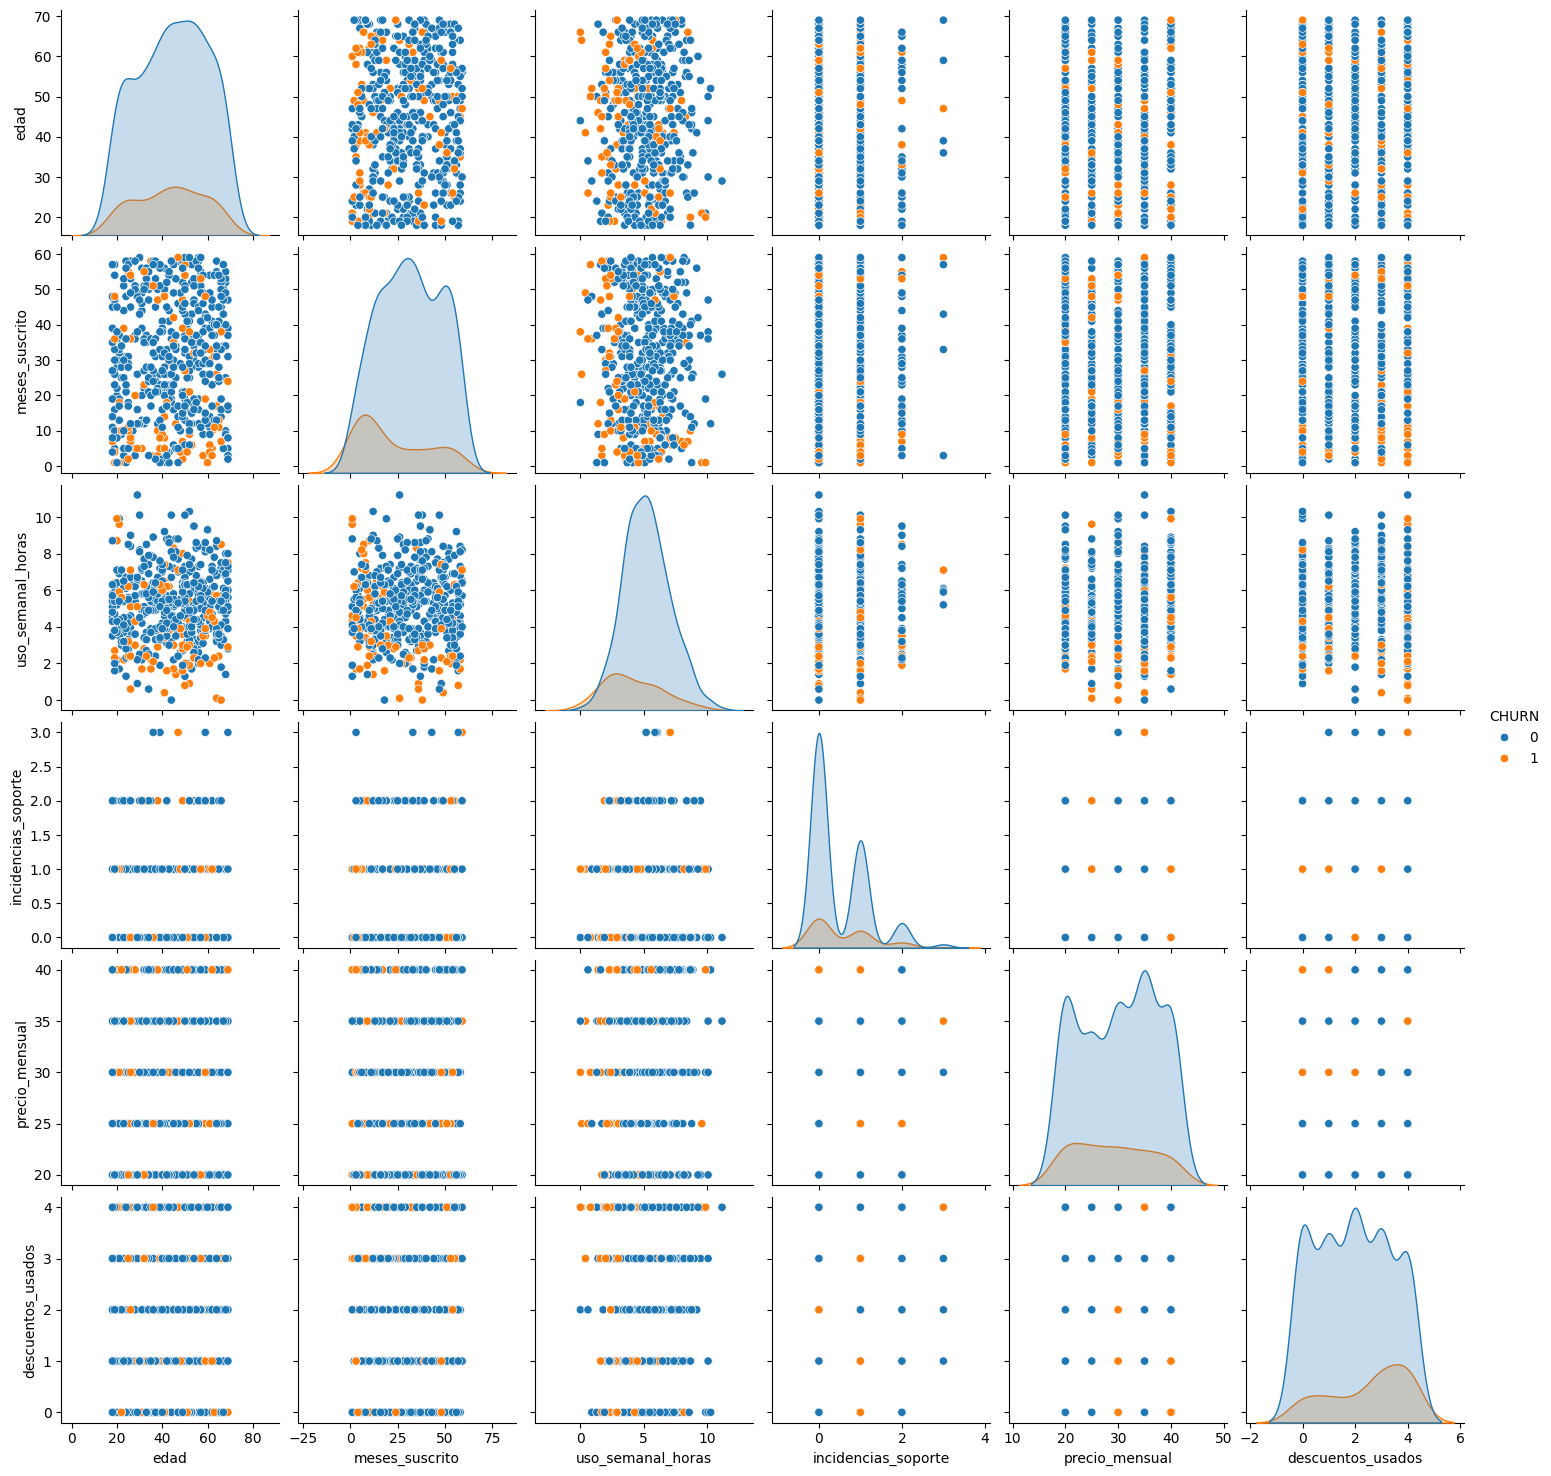

In [17]:
sns.pairplot(df, hue='CHURN')
plt.show()

KNN se basa en distancias, por lo que es obligatorio estandarizar.

Importa StandardScaler

Crea un objeto scaler

Ajusta el escalador a las características

Transforma las características

Convierte el resultado en un DataFrame

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('CHURN', axis=1))

scaled_features = scaler.transform(df.drop('CHURN', axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled.head()

,edad,meses_suscrito,uso_semanal_horas,incidencias_soporte,precio_mensual,descuentos_usados
0,0.784233,-0.819187,-1.040806,-0.723893,0.001398,-0.735638
1,1.649686,0.525084,0.483365,-0.723893,1.399625,0.673630
2,0.118500,-1.462100,-0.583554,0.747434,1.399625,-0.031004
3,-0.813526,-0.468508,-0.837583,0.747434,1.399625,1.378263
4,1.050527,-0.059382,-0.126303,0.747434,0.700512,-1.440271


División Train / Test

Divide los datos en entrenamiento y test (70% / 30%).

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['CHURN'], test_size=0.3)

Uso de KNN

Crea un modelo KNN con n_neighbors = 1

Entrénalo con los datos de entrenamiento

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",1
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",1
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


Predicciones y evaluación

Realiza predicciones sobre el conjunto de test

Muestra:

Matriz de confusión

Informe de clasificación

In [14]:
pred = knn.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[103  11]
 [ 22  14]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       114
           1       0.56      0.39      0.46        36

    accuracy                           0.78       150
   macro avg       0.69      0.65      0.66       150
weighted avg       0.76      0.78      0.77       150



Elección del valor de K

Entrena modelos con distintos valores de K

Calcula la tasa de error

Representa la curva del método del codo

Text(0.5, 1.0, 'Error Rate vs. K Value')

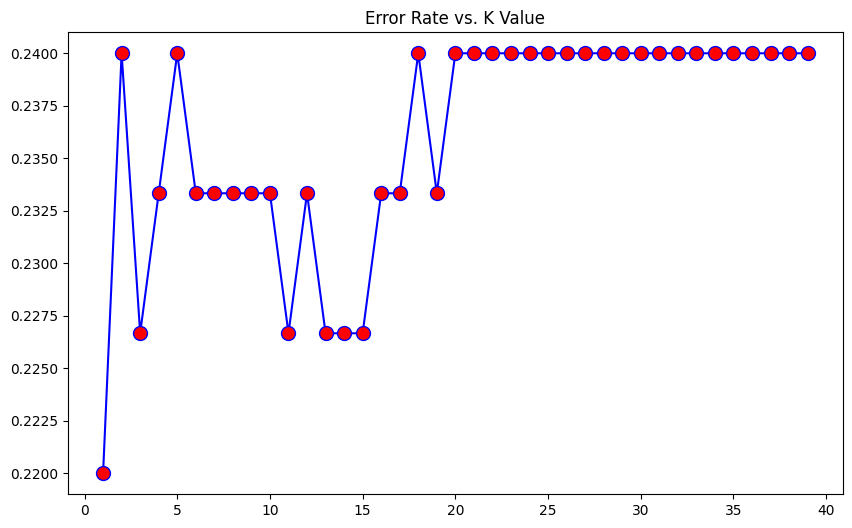

In [19]:
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value') 


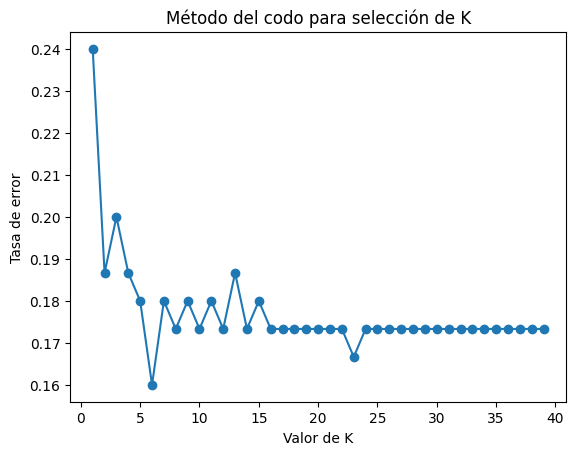

Reentrenamiento con el mejor K

Reentrena el modelo con el mejor K

Repite la evaluación

[[124   0]
 [ 26   0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       124
           1       0.00      0.00      0.00        26

    accuracy                           0.83       150
   macro avg       0.41      0.50      0.45       150
weighted avg       0.68      0.83      0.75       150



c:\Users\natxo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\natxo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\natxo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave